# Importing Libraries & datasets

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [99]:
df1 = pd.read_excel("dataset\ProductA.xlsx")
df2 = pd.read_excel("dataset\ProductA_google_clicks.xlsx")
df3 = pd.read_excel("dataset\ProductA_fb_impressions.xlsx")

# Data Preprocessing

### Merging datasets

In [100]:
df4 = pd.merge(df1, df2, on="Day Index")
df = pd.merge(df4, df3, on="Day Index")

In [101]:
df.to_excel('final_df.xlsx', index=False)

In [102]:
df.head()

,Day Index,Quantity,Clicks,Impressions
0,2021-12-01,14,445,620
1,2021-12-02,10,433,890
2,2021-12-03,13,424,851
3,2021-12-04,22,427,881
4,2021-12-05,33,451,678


### Missing values - Median Imputation

In [103]:
print("NULL Values:")
df.isnull().sum()

NULL Values:


Day Index      0
Quantity       0
Clicks         0
Impressions    0
dtype: int64

Hence, there are no NULL values. So, No median imputation needed.

### Dropping Duplicates

In [104]:
df.shape

(212, 4)

In [105]:
df.drop_duplicates()

,Day Index,Quantity,Clicks,Impressions
0,2021-12-01,14,445,620
1,2021-12-02,10,433,890
2,2021-12-03,13,424,851
3,2021-12-04,22,427,881
4,2021-12-05,33,451,678
...,...,...,...,...
207,2022-06-26,13,114,1218
208,2022-06-27,16,106,1311
209,2022-06-28,13,109,885
210,2022-06-29,16,60,1000


Hence, no duplicates found

### Analysing Outliers

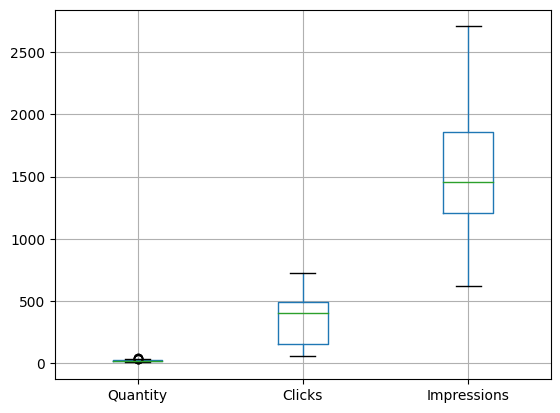

In [106]:
plt.figure()
df.boxplot()
plt.show()

In [107]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

print("Outliers in each dependent attribute:")
print(f"Quantity:\t {len(find_outliers_IQR(df['Quantity']))}")
print(f"Clicks:\t\t {len(find_outliers_IQR(df['Clicks']))}")
print(f"Impressions:\t {len(find_outliers_IQR(df['Impressions']))}")

Outliers in each dependent attribute:
Quantity:	 5
Clicks:		 0
Impressions:	 0


So, there are 5 outliers in the *Quantity* attribute

In [108]:
print(f"Quantity:\n{find_outliers_IQR(df['Quantity'])}")

Quantity:
4      33
9      38
78     38
113    32
142    36
Name: Quantity, dtype: int64


### Replacing Outliers with median values

In [109]:
df_without_outlier = df.copy()

In [110]:
def impute_outliers_IQR(series):
    q1, q3 = series.quantile([0.25, 0.75])
    IQR = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * IQR, q3 + 1.5 * IQR
    median_value = series.median()
    return series.apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

In [111]:
df_without_outlier['Quantity'] = impute_outliers_IQR(df_without_outlier['Quantity'])

In [112]:
print("Outliers in each dependent attribute:")
print(f"Quantity:\t {len(find_outliers_IQR(df_without_outlier['Quantity']))}")
print(f"Clicks:\t\t {len(find_outliers_IQR(df_without_outlier['Clicks']))}")
print(f"Impressions:\t {len(find_outliers_IQR(df_without_outlier['Impressions']))}")

Outliers in each dependent attribute:
Quantity:	 2
Clicks:		 0
Impressions:	 0


In [113]:
find_outliers_IQR(df_without_outlier['Quantity'])

94     31.0
138    31.0
Name: Quantity, dtype: float64

In [114]:
df_without_outlier['Quantity'] = impute_outliers_IQR(df_without_outlier['Quantity'])

In [115]:
print("Outliers in each dependent attribute:")
print(f"Quantity:\t {len(find_outliers_IQR(df_without_outlier['Quantity']))}")
print(f"Clicks:\t\t {len(find_outliers_IQR(df_without_outlier['Clicks']))}")
print(f"Impressions:\t {len(find_outliers_IQR(df_without_outlier['Impressions']))}")

Outliers in each dependent attribute:
Quantity:	 1
Clicks:		 0
Impressions:	 0


In [116]:
find_outliers_IQR(df_without_outlier['Quantity'])

141    30.0
Name: Quantity, dtype: float64

In [117]:
df_without_outlier['Quantity'] = impute_outliers_IQR(df_without_outlier['Quantity'])

In [118]:
print("Outliers in each dependent attribute:")
print(f"Quantity:\t {len(find_outliers_IQR(df_without_outlier['Quantity']))}")
print(f"Clicks:\t\t {len(find_outliers_IQR(df_without_outlier['Clicks']))}")
print(f"Impressions:\t {len(find_outliers_IQR(df_without_outlier['Impressions']))}")

Outliers in each dependent attribute:
Quantity:	 0
Clicks:		 0
Impressions:	 0


In [119]:
df_without_outlier.head()

,Day Index,Quantity,Clicks,Impressions
0,2021-12-01,14.0,445,620
1,2021-12-02,10.0,433,890
2,2021-12-03,13.0,424,851
3,2021-12-04,22.0,427,881
4,2021-12-05,17.0,451,678


Hence, the outliers are replaced by median values.

### Log transformation

In [120]:
df_log = df.copy()

In [121]:
df_log['Log_Quantity'] = np.log1p(df_log['Quantity'])
df_log['Log_Clicks'] = np.log1p(df_log['Clicks'])
df_log['Log_Impressions'] = np.log1p(df_log['Impressions'])

In [122]:
df_log.head()

,Day Index,Quantity,Clicks,Impressions,Log_Quantity,Log_Clicks,Log_Impressions
0,2021-12-01,14,445,620,2.708050,6.100319,6.431331
1,2021-12-02,10,433,890,2.397895,6.073045,6.792344
2,2021-12-03,13,424,851,2.639057,6.052089,6.747587
3,2021-12-04,22,427,881,3.135494,6.059123,6.782192
4,2021-12-05,33,451,678,3.526361,6.113682,6.520621


In [123]:
df.head()

,Day Index,Quantity,Clicks,Impressions
0,2021-12-01,14,445,620
1,2021-12-02,10,433,890
2,2021-12-03,13,424,851
3,2021-12-04,22,427,881
4,2021-12-05,33,451,678


# Hypothesis Evaluation

### 1. How Clicks affect the Product's quantity?

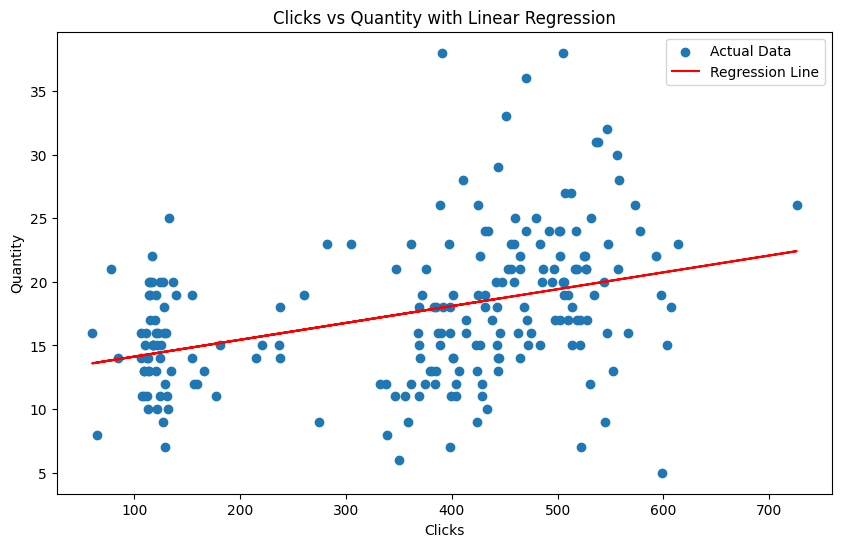

The slope of the linear regression model is: 0.013234961483654805


In [124]:
from sklearn.linear_model import LinearRegression

x = df["Clicks"].values.reshape(-1, 1)
y = df["Quantity"].values

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

plt.figure(figsize=(10, 6))
plt.scatter(df['Clicks'], df['Quantity'], label='Actual Data')
plt.plot(df['Clicks'], y_pred, color='red', label='Regression Line')
plt.title('Clicks vs Quantity with Linear Regression')
plt.xlabel('Clicks')
plt.ylabel('Quantity')
plt.legend()
plt.show()

slope = model.coef_[0]
print(f"The slope of the linear regression model is: {slope}")

~ For every additional click, the quantity increases by approximately 0.0114 units.

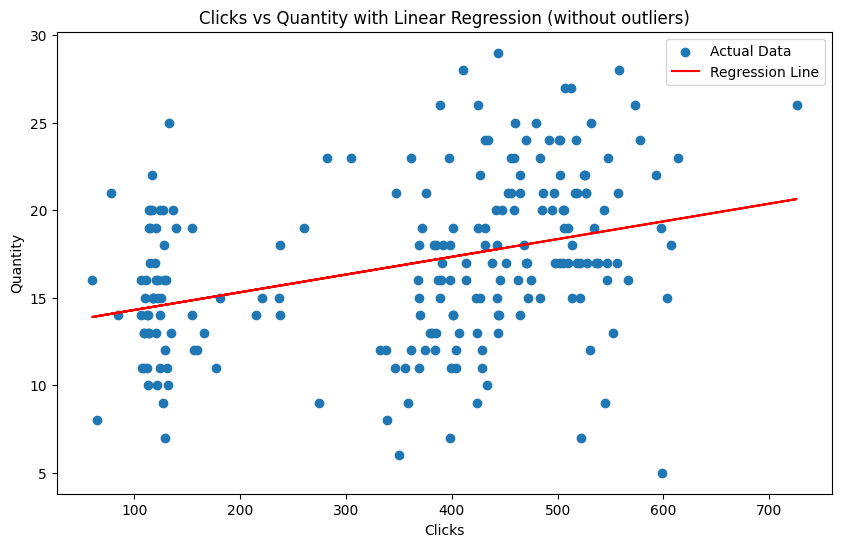

The slope of the linear regression model is: 0.010120031987426179


In [125]:
from sklearn.linear_model import LinearRegression

x = df_without_outlier["Clicks"].values.reshape(-1, 1)
y = df_without_outlier["Quantity"].values

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

plt.figure(figsize=(10, 6))
plt.scatter(df_without_outlier['Clicks'], df_without_outlier['Quantity'], label='Actual Data')
plt.plot(df_without_outlier['Clicks'], y_pred, color='red', label='Regression Line')
plt.title('Clicks vs Quantity with Linear Regression (without outliers)')
plt.xlabel('Clicks')
plt.ylabel('Quantity')
plt.legend()
plt.show()

slope = model.coef_[0]
print(f"The slope of the linear regression model is: {slope}")

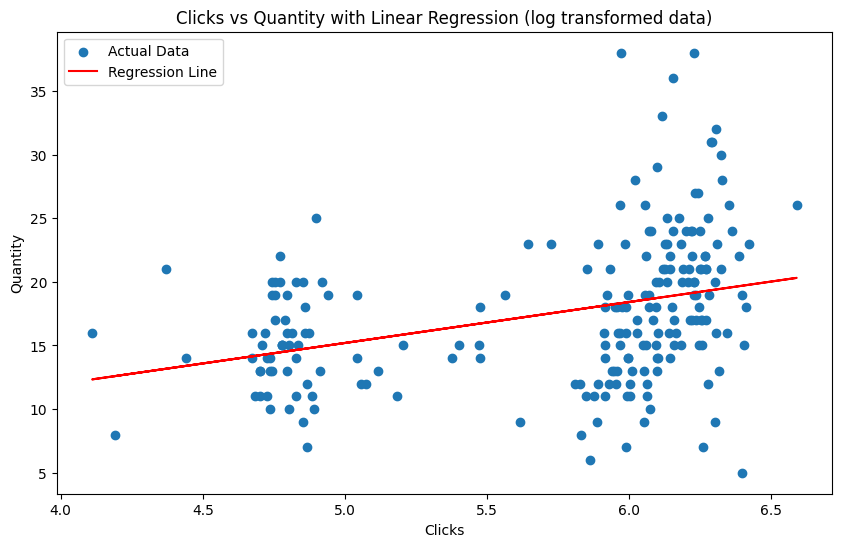

The slope of the linear regression model is: 3.2186587601137284


In [126]:
from sklearn.linear_model import LinearRegression

x = df_log["Log_Clicks"].values.reshape(-1, 1)
y = df_log["Quantity"].values

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

plt.figure(figsize=(10, 6))
plt.scatter(df_log['Log_Clicks'], df_log['Quantity'], label='Actual Data')
plt.plot(df_log['Log_Clicks'], y_pred, color='red', label='Regression Line')
plt.title('Clicks vs Quantity with Linear Regression (log transformed data)')
plt.xlabel('Clicks')
plt.ylabel('Quantity')
plt.legend()
plt.show()

slope = model.coef_[0]
print(f"The slope of the linear regression model is: {slope}")

Hence, there is a relation with +ve slope, i.e. Quantity increases as Clicks increases.
***

### 2. How Impressions affect the Product's quantity?

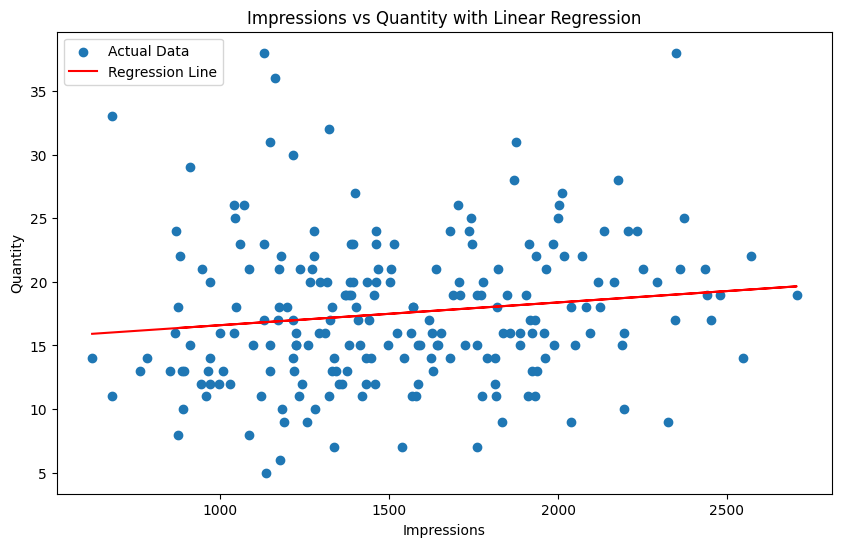

The slope of the linear regression model is: 0.0017863293104571235


In [127]:
from sklearn.linear_model import LinearRegression

x = df["Impressions"].values.reshape(-1, 1)
y = df["Quantity"].values

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

plt.figure(figsize=(10, 6))
plt.scatter(df['Impressions'], df['Quantity'], label='Actual Data')
plt.plot(df['Impressions'], y_pred, color='red', label='Regression Line')
plt.title('Impressions vs Quantity with Linear Regression')
plt.xlabel('Impressions')
plt.ylabel('Quantity')
plt.legend()
plt.show()

slope = model.coef_[0]
print(f"The slope of the linear regression model is: {slope}")

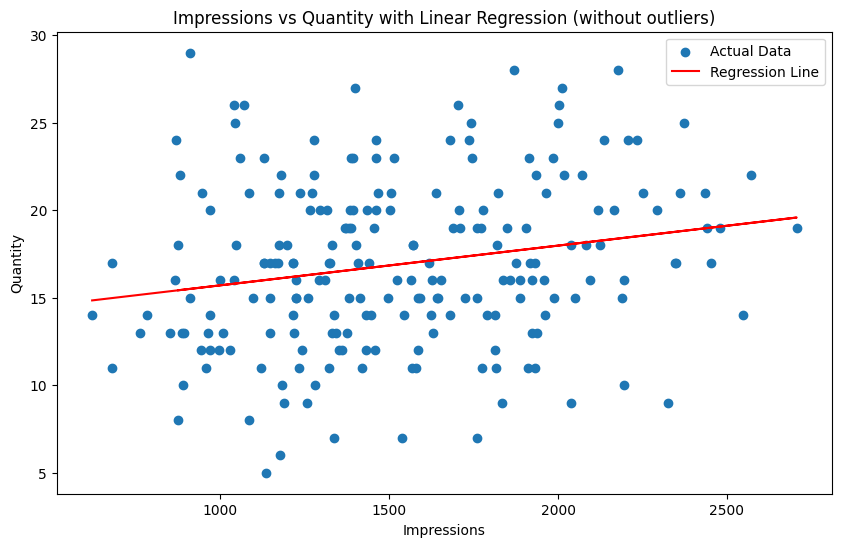

The slope of the linear regression model is: 0.002268934260063536


In [128]:
from sklearn.linear_model import LinearRegression

x = df_without_outlier["Impressions"].values.reshape(-1, 1)
y = df_without_outlier["Quantity"].values

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

plt.figure(figsize=(10, 6))
plt.scatter(df_without_outlier['Impressions'], df_without_outlier['Quantity'], label='Actual Data')
plt.plot(df_without_outlier['Impressions'], y_pred, color='red', label='Regression Line')
plt.title('Impressions vs Quantity with Linear Regression (without outliers)')
plt.xlabel('Impressions')
plt.ylabel('Quantity')
plt.legend()
plt.show()

slope = model.coef_[0]
print(f"The slope of the linear regression model is: {slope}")

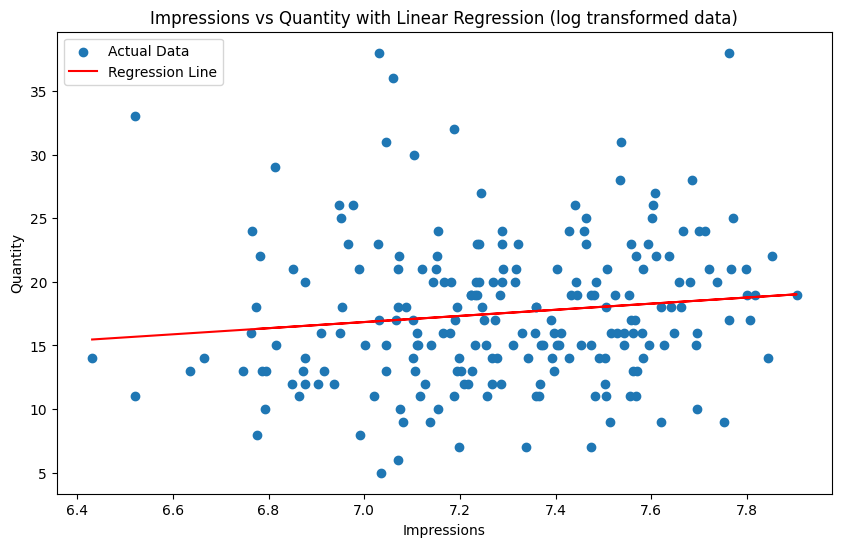

The slope of the linear regression model is: 2.409679402676977


In [129]:
from sklearn.linear_model import LinearRegression

x = df_log["Log_Impressions"].values.reshape(-1, 1)
y = df_log["Quantity"].values

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

plt.figure(figsize=(10, 6))
plt.scatter(df_log["Log_Impressions"], df_log['Quantity'], label='Actual Data')
plt.plot(df_log["Log_Impressions"], y_pred, color='red', label='Regression Line')
plt.title('Impressions vs Quantity with Linear Regression (log transformed data)')
plt.xlabel('Impressions')
plt.ylabel('Quantity')
plt.legend()
plt.show()

slope = model.coef_[0]
print(f"The slope of the linear regression model is: {slope}")

Hence, there is a +ve slope that means an increase in impressions can slightly increase the quantity demanded.
***

### 3. How Days of the month affect the Product's quantity? ---> No relation

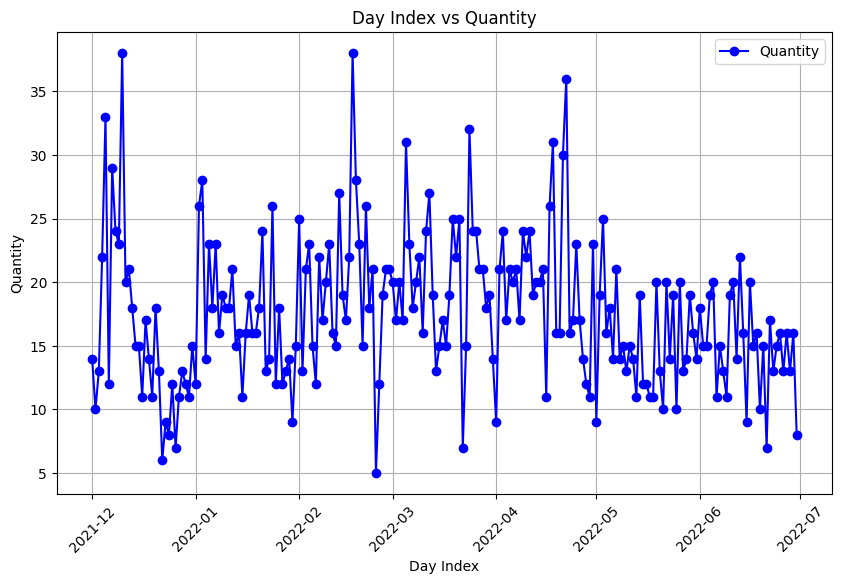

In [130]:
plt.figure(figsize=(10, 6))
plt.plot(df['Day Index'], df['Quantity'], marker='o', color='blue', label='Quantity')
plt.title('Day Index vs Quantity')
plt.xlabel('Day Index')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
 

#### 3.1: Day wise each Month Quantity 

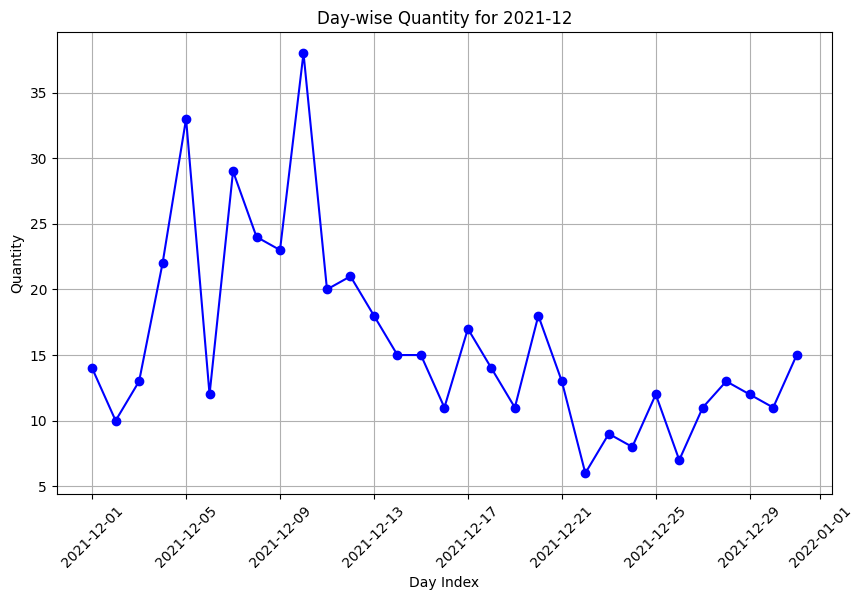

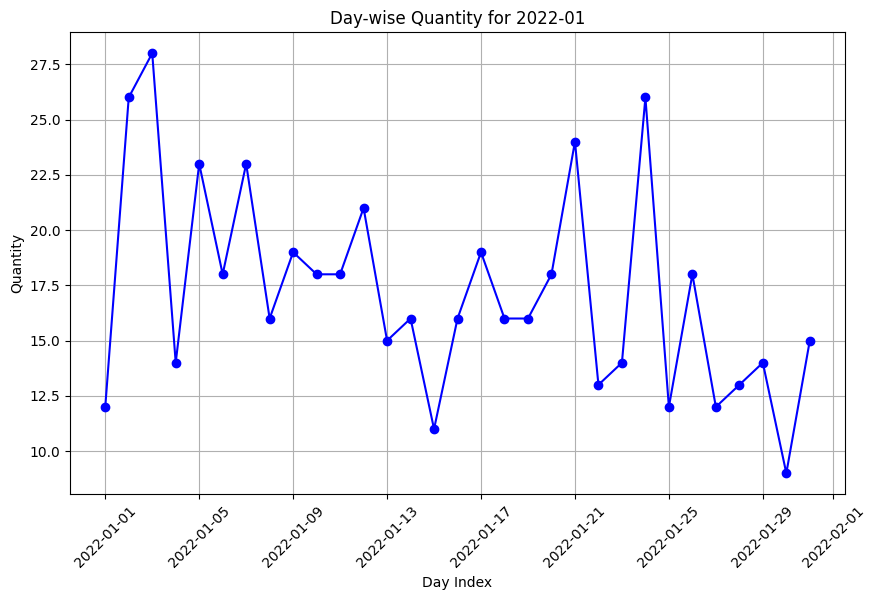

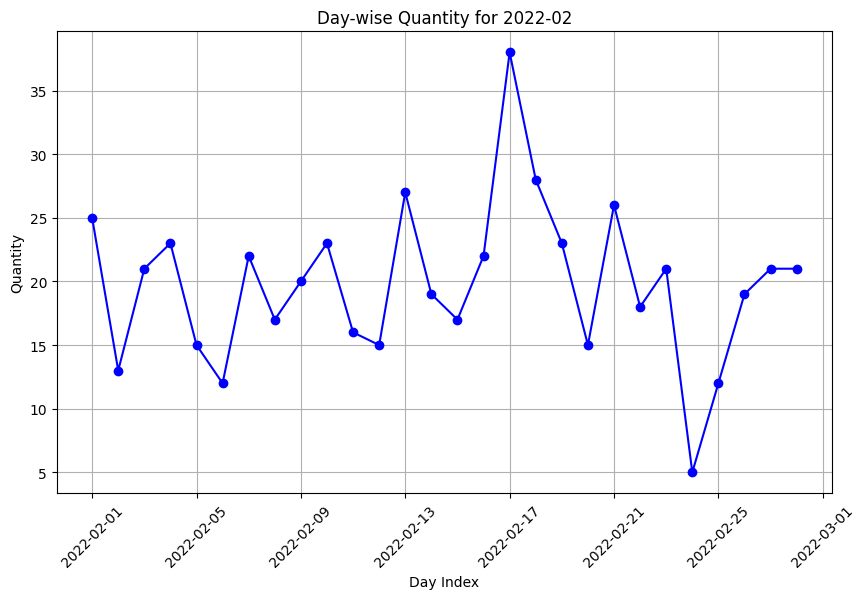

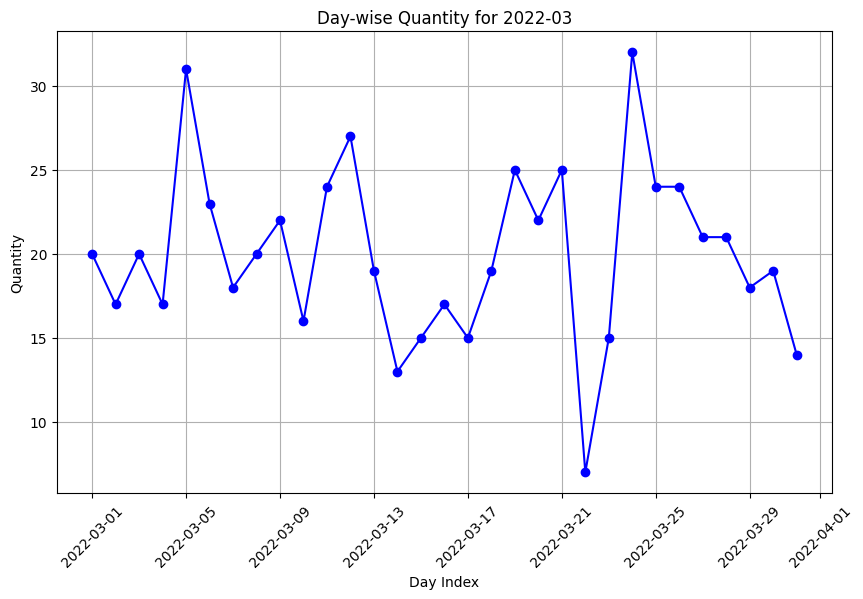

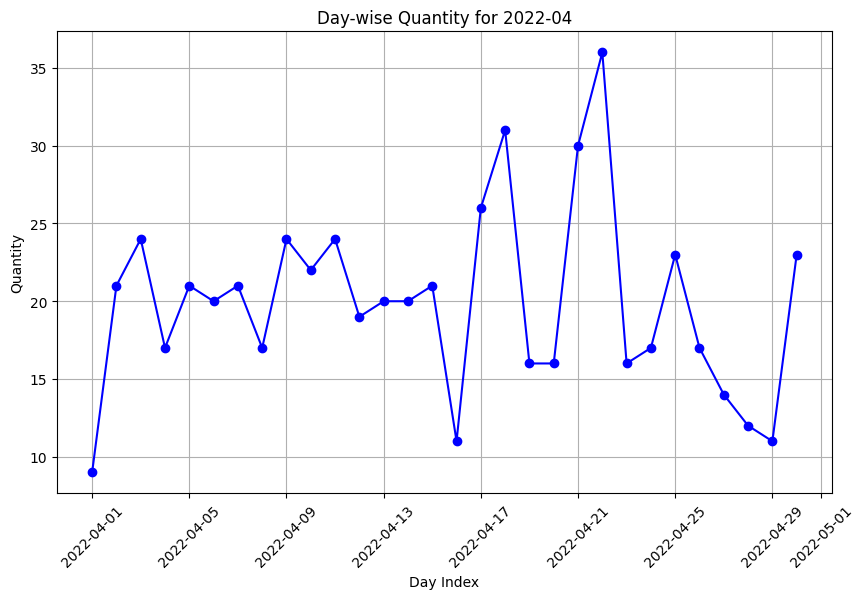

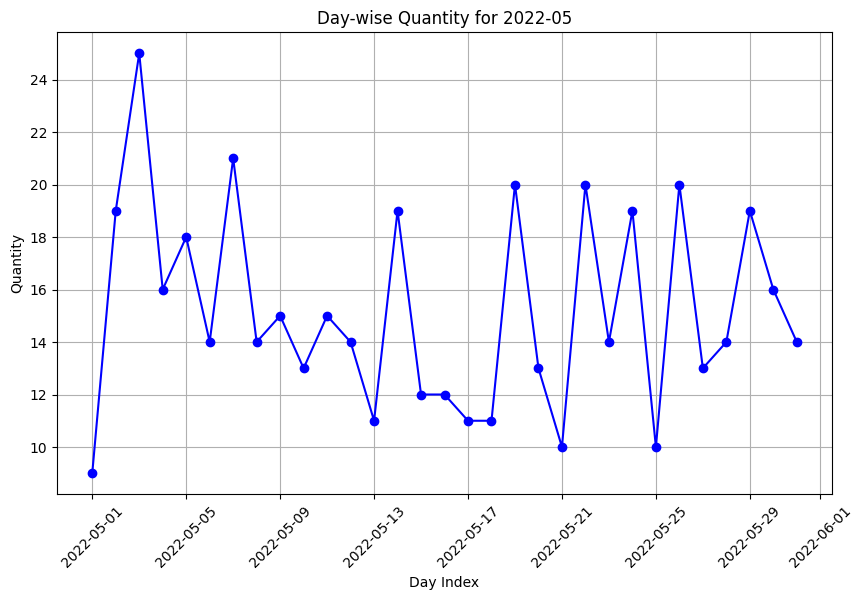

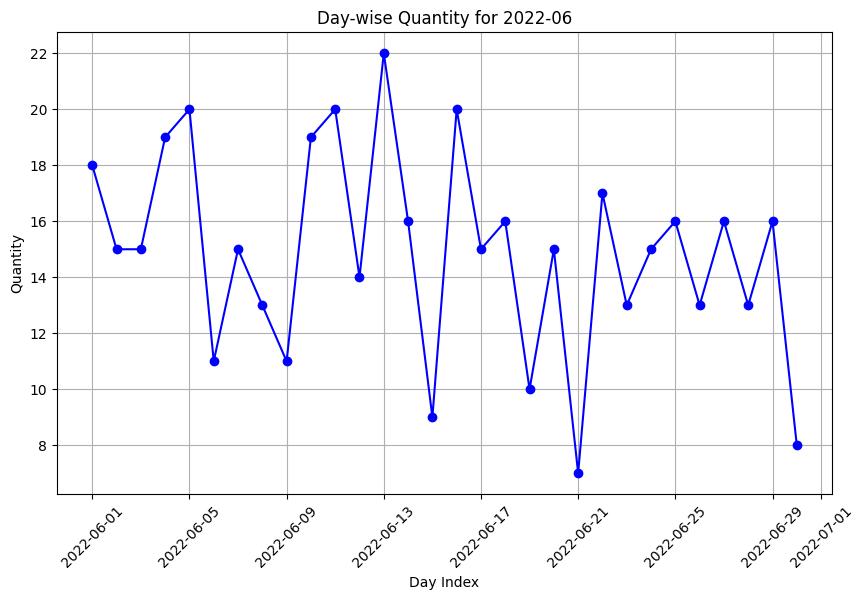

In [131]:
df['Day Index'] = pd.to_datetime(df['Day Index'])

# Extract month and year
df['YearMonth'] = df['Day Index'].dt.to_period('M')

# Iterate over each month
for month in df['YearMonth'].unique():
    monthly_data = df[df['YearMonth'] == month]
    
    # Plot day-wise quantity for the month
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_data['Day Index'], monthly_data['Quantity'], marker='o', linestyle='-', color='blue')
    plt.title(f'Day-wise Quantity for {month}')
    plt.xlabel('Day Index')
    plt.ylabel('Quantity')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

Hence, we can see that demand of product A varies according to days of the month.
and no particular relation can be derived.

***

### 4. How the month affect the Product's quantity?

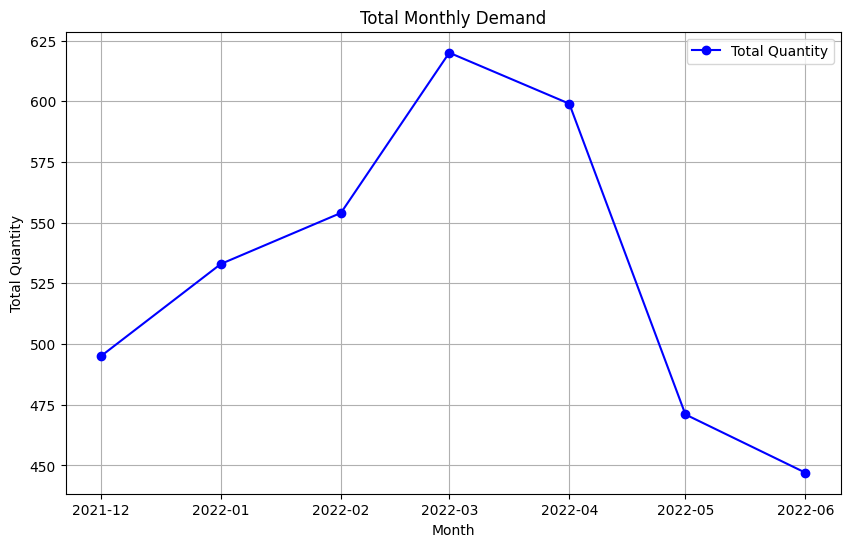

In [132]:
df['Day Index'] = pd.to_datetime(df['Day Index'])

# Extract month and year
df['YearMonth'] = df['Day Index'].dt.to_period('M')

# Group by month and sum the quantities
monthly_demand = df.groupby('YearMonth')['Quantity'].sum().reset_index()

# Convert YearMonth to datetime for plotting
monthly_demand['YearMonth'] = monthly_demand['YearMonth'].dt.to_timestamp()

plt.figure(figsize=(10, 6))
plt.plot(monthly_demand['YearMonth'], monthly_demand['Quantity'], marker='o', color='blue', label='Total Quantity')
plt.title('Total Monthly Demand')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.legend()
plt.show()

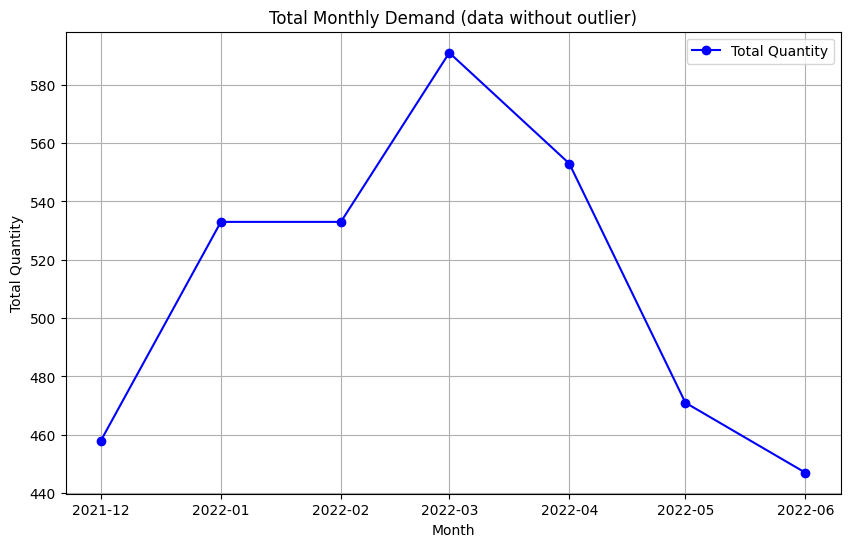

In [133]:
df_without_outlier['Day Index'] = pd.to_datetime(df_without_outlier['Day Index'])

# Extract month and year
df_without_outlier['YearMonth'] = df_without_outlier['Day Index'].dt.to_period('M')

# Group by month and sum the quantities
monthly_demand = df_without_outlier.groupby('YearMonth')['Quantity'].sum().reset_index()

# Convert YearMonth to datetime for plotting
monthly_demand['YearMonth'] = monthly_demand['YearMonth'].dt.to_timestamp()

plt.figure(figsize=(10, 6))
plt.plot(monthly_demand['YearMonth'], monthly_demand['Quantity'], marker='o', color='blue', label='Total Quantity')
plt.title('Total Monthly Demand (data without outlier)')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.legend()
plt.show()

Hence, the total quantity demanded of Product A increases as winters arrive and reaches its peak in March and then declines rapidly.
***

### 5. Does more impressions lead to more clicks?

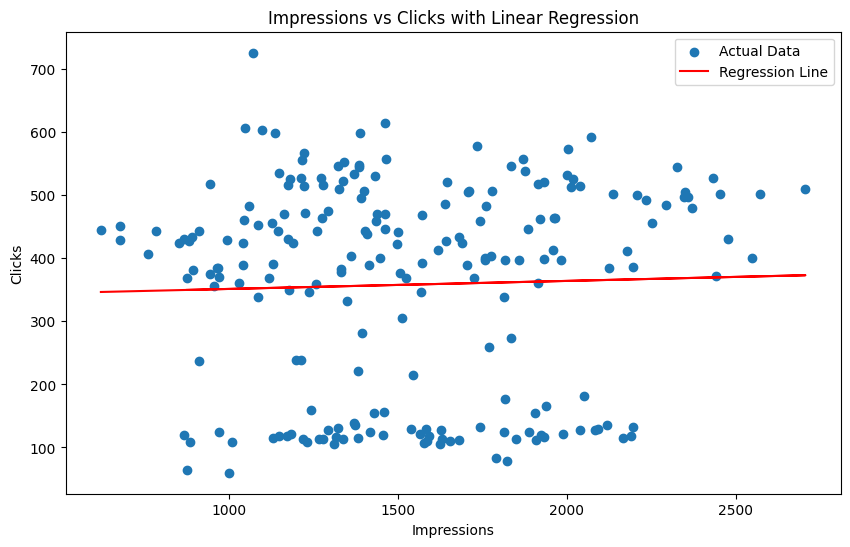

The slope of the linear regression model is: 0.012709310479620622


In [134]:
from sklearn.linear_model import LinearRegression

x = df["Impressions"].values.reshape(-1, 1)
y = df["Clicks"].values

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

plt.figure(figsize=(10, 6))
plt.scatter(df['Impressions'], df['Clicks'], label='Actual Data')
plt.plot(df['Impressions'], y_pred, color='red', label='Regression Line')
plt.title('Impressions vs Clicks with Linear Regression')
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.legend()
plt.show()

slope = model.coef_[0]
print(f"The slope of the linear regression model is: {slope}")

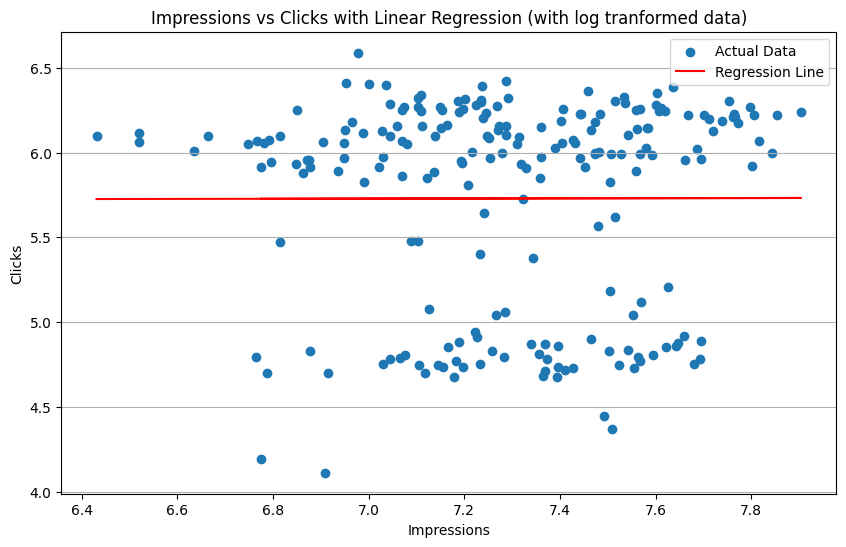

The slope of the linear regression model is: 0.004241626376529049


In [135]:
from sklearn.linear_model import LinearRegression

x = df_log["Log_Impressions"].values.reshape(-1, 1)
y = df_log["Log_Clicks"].values

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

plt.figure(figsize=(10, 6))
plt.scatter(df_log["Log_Impressions"], df_log["Log_Clicks"], label='Actual Data')
plt.plot(df_log["Log_Impressions"], y_pred, color='red', label='Regression Line')
plt.title('Impressions vs Clicks with Linear Regression (with log tranformed data)')
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.grid(axis='y')
plt.legend()
plt.show()

slope = model.coef_[0]
print(f"The slope of the linear regression model is: {slope}")

 ~ If the number of impressions increases by 1000, the clicks are expected to increase by approximately 4.2 units.

Hence the slope is +ve and thus proves the hypothesis.
***

### 6. How days in a week affect the Product Quantity?

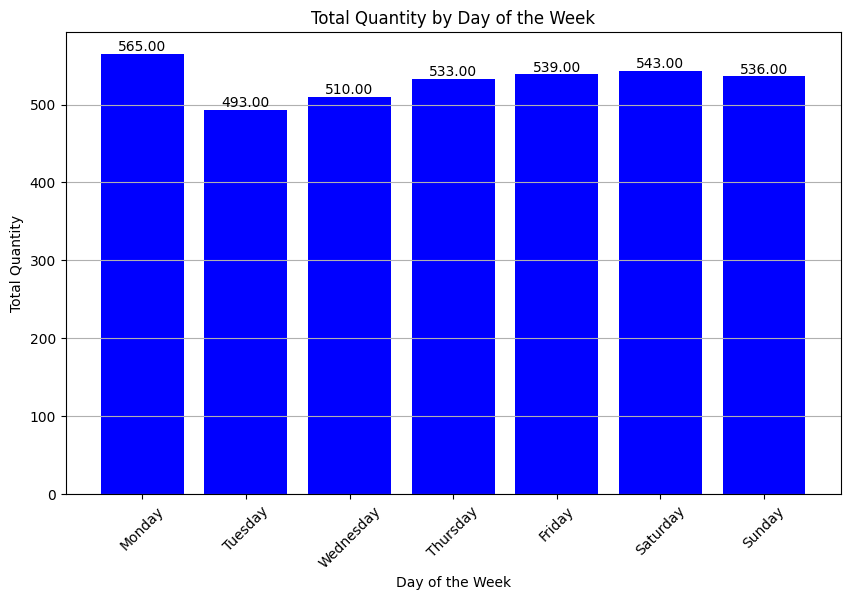

In [136]:
# Ensure Day Index is a datetime object
df['Day Index'] = pd.to_datetime(df['Day Index'])

# Extract day of the week
df['DayOfWeek'] = df['Day Index'].dt.day_name()

# Group by day of the week and calculate the total quantity
day_of_week_demand = df.groupby('DayOfWeek')['Quantity'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(day_of_week_demand.index, day_of_week_demand, color='blue')

# Add labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')
    
plt.title('Total Quantity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

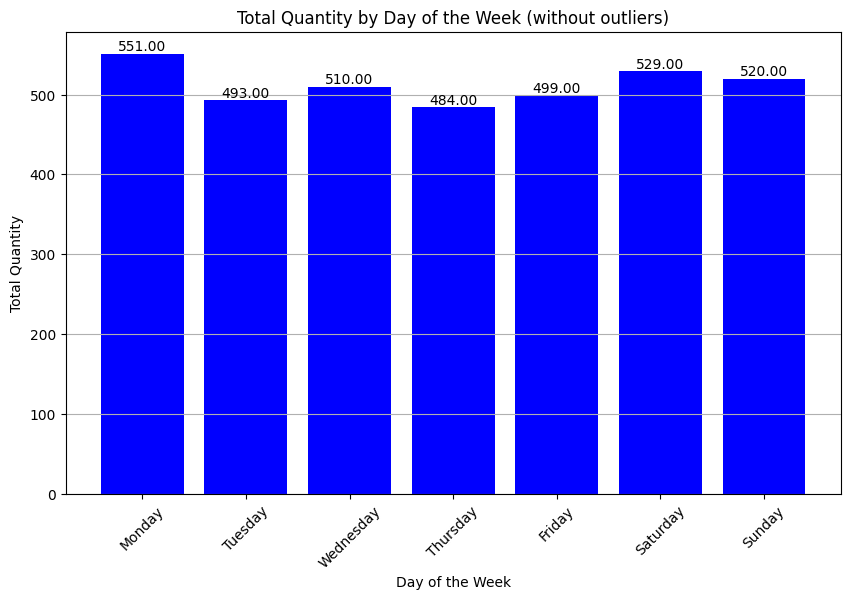

In [137]:
# Ensure Day Index is a datetime object
df_without_outlier['Day Index'] = pd.to_datetime(df_without_outlier['Day Index'])

# Extract day of the week
df_without_outlier['DayOfWeek'] = df_without_outlier['Day Index'].dt.day_name()

# Group by day of the week and calculate the total quantity
day_of_week_demand = df_without_outlier.groupby('DayOfWeek')['Quantity'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(day_of_week_demand.index, day_of_week_demand, color='blue')

# Add labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')
    
plt.title('Total Quantity by Day of the Week (without outliers)')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

As we can derive 2 conclusions from the total Product's quantity of each day:
* Monday accounts for the highest Product's quantity demand.
* Tuesday & Thursday accounts for the lowest Product's quantity demand in with outlier and without outlier data respectively.

***

### 7. Autocorrelation between past and future values:

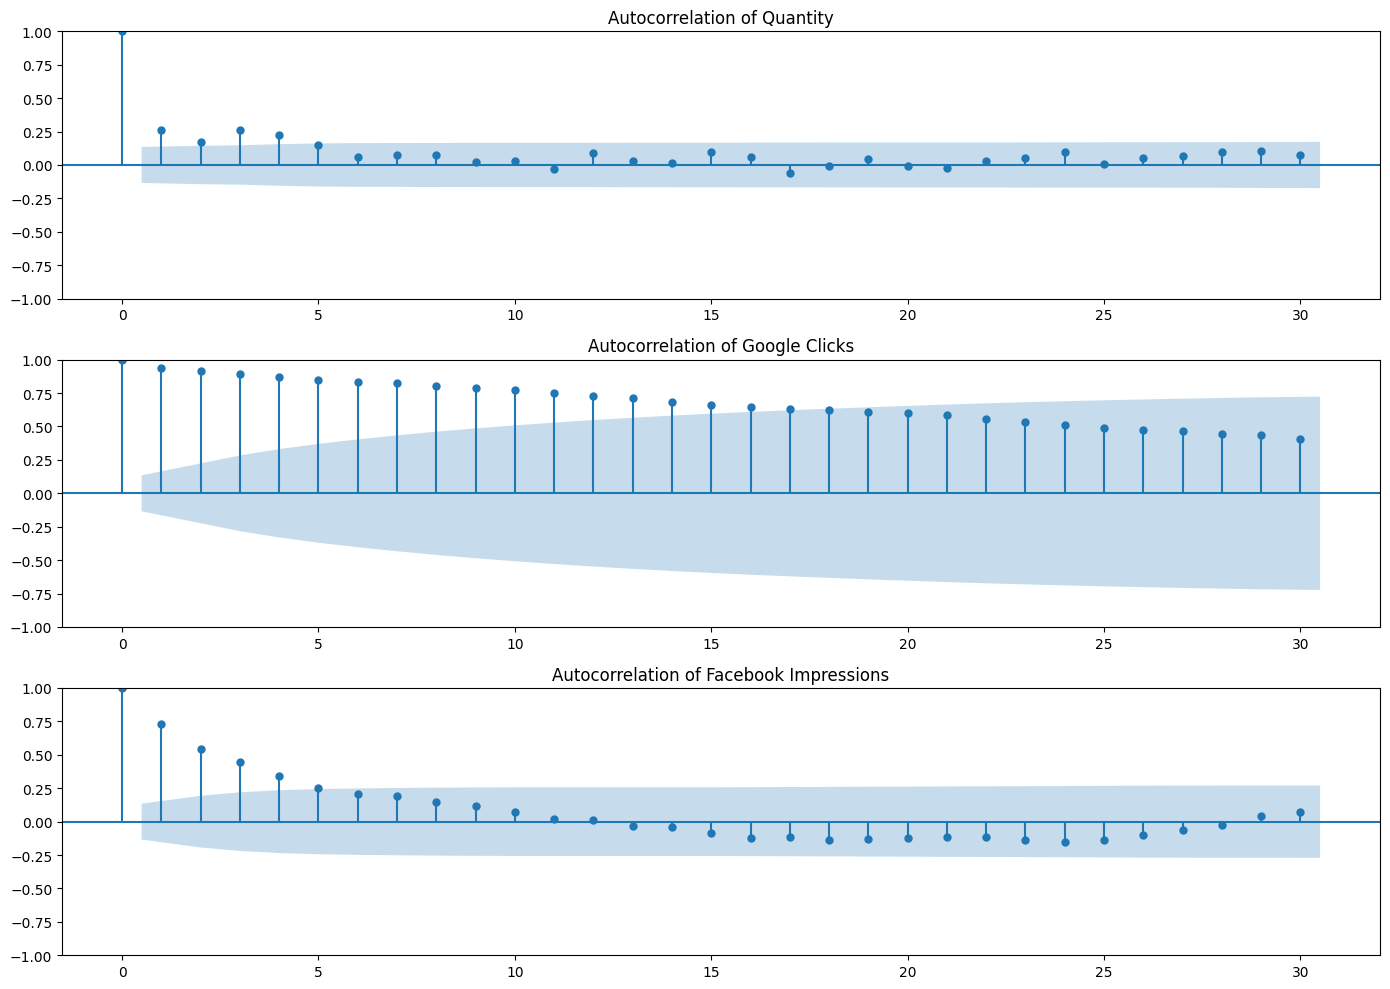

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Plotting the ACF for Sales, Google Clicks, and Facebook Impressions
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plot_acf(df['Quantity'], ax=plt.gca(), lags=30)
plt.title('Autocorrelation of Quantity')

plt.subplot(3, 1, 2)
plot_acf(df['Clicks'], ax=plt.gca(), lags=30)
plt.title('Autocorrelation of Google Clicks')

plt.subplot(3, 1, 3)
plot_acf(df['Impressions'], ax=plt.gca(), lags=30)
plt.title('Autocorrelation of Facebook Impressions')

plt.tight_layout()
plt.show()


### 8. COrrelation of lagged variables with current sales

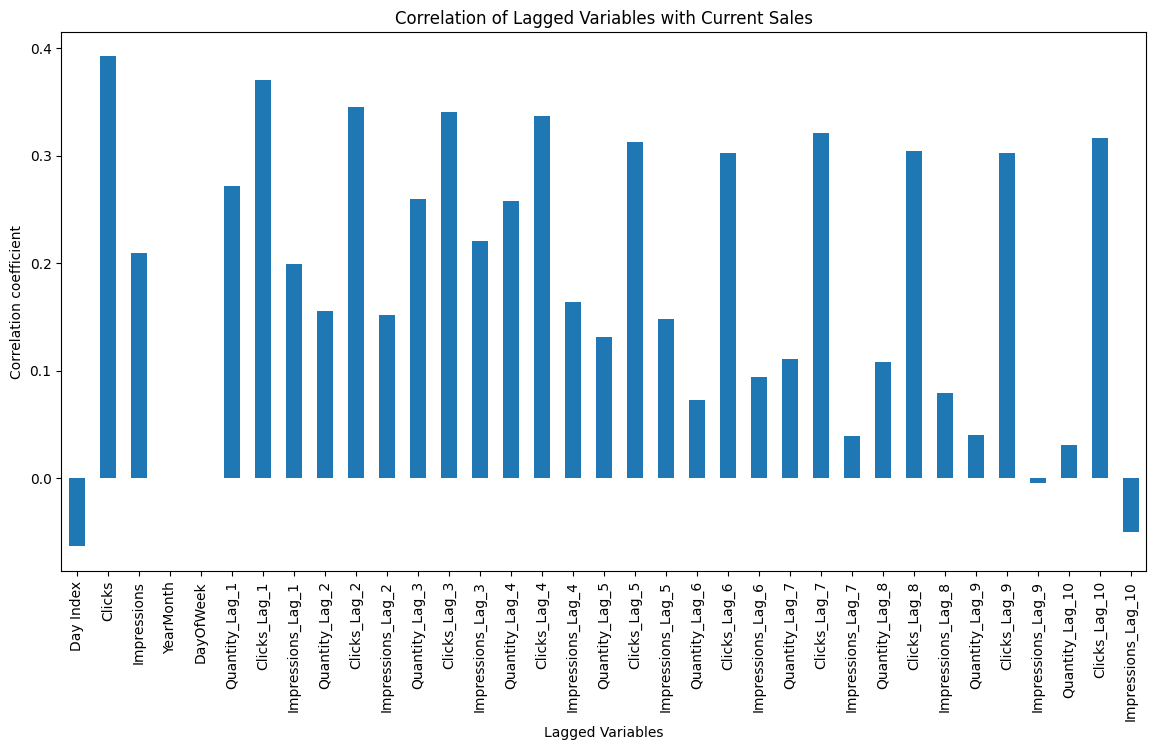

Day Index            -0.063719
Clicks                0.392188
Impressions           0.209117
YearMonth                  NaN
DayOfWeek                  NaN
Quantity_Lag_1        0.271546
Clicks_Lag_1          0.370342
Impressions_Lag_1     0.198865
Quantity_Lag_2        0.155431
Clicks_Lag_2          0.345243
Impressions_Lag_2     0.152076
Quantity_Lag_3        0.259963
Clicks_Lag_3          0.340777
Impressions_Lag_3     0.220177
Quantity_Lag_4        0.258017
Clicks_Lag_4          0.337092
Impressions_Lag_4     0.163929
Quantity_Lag_5        0.131298
Clicks_Lag_5          0.312557
Impressions_Lag_5     0.147570
Quantity_Lag_6        0.072187
Clicks_Lag_6          0.302679
Impressions_Lag_6     0.094318
Quantity_Lag_7        0.111079
Clicks_Lag_7          0.321233
Impressions_Lag_7     0.039450
Quantity_Lag_8        0.107661
Clicks_Lag_8          0.304553
Impressions_Lag_8     0.078995
Quantity_Lag_9        0.039796
Clicks_Lag_9          0.302803
Impressions_Lag_9    -0.004688
Quantity

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Create lagged variables
lags = 10
lagged_data = df.copy()
for i in range(1, lags + 1):
    lagged_data[f'Quantity_Lag_{i}'] = df['Quantity'].shift(i)
    lagged_data[f'Clicks_Lag_{i}'] = df['Clicks'].shift(i)
    lagged_data[f'Impressions_Lag_{i}'] = df['Impressions'].shift(i)

# Drop rows with NaN values created by the lagging
lagged_data.dropna(inplace=True)

# Convert columns to numeric if needed
lagged_data = lagged_data.apply(pd.to_numeric, errors='coerce')

# Correlation plot of lagged variables with current Sales
correlations = lagged_data.corr()['Quantity'].drop('Quantity')

plt.figure(figsize=(14, 7))
correlations.plot(kind='bar')
plt.title('Correlation of Lagged Variables with Current Sales')
plt.ylabel('Correlation coefficient')
plt.xlabel('Lagged Variables')
plt.show()

# Display the correlation values for better understanding
print(correlations)


***

# next